In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smopy

import ipdb

# 接下来两块是数据的预处理（不需要执行）

In [2]:
# metadata = pd.read_csv('./Proj_Data/section7.txt', delimiter='\t')

In [3]:
# date = 21
# data = pd.read_csv('./Proj_Data/2019-10-'+str(date)+'.txt', delimiter='\t')

# data_new = data.iloc[:, :12]
# data_new = data_new.dropna(subset=['q', 'Station len', 'Avg k'])
# data_new = data_new.reset_index()

# data_new['Long'] = ''
# data_new['Lat'] = ''

# data_new_ID = data_new['ID'].drop_duplicates()
# for i in range(len(data_new_ID)):
#     if i%500==0:
#         print('%i of %i'%(i, len(data_new_ID)))
#     ID = data_new_ID[i]
#     long = metadata.loc[metadata['ID']==ID, 'Longitude'].values[0]
#     lat = metadata.loc[metadata['ID']==ID, 'Latitude'].values[0]
    
#     data_new.loc[data_new['ID']==ID, 'Long'] = long
#     data_new.loc[data_new['ID']==ID, 'Lat'] = lat

# data_new['Long'] = data_new['Long'].astype(float)
# data_new['Lat'] = data_new['Lat'].astype(float)
# data_new.to_csv('./Proj_Data/2019-10-'+str(date)+'_with_cord.csv')

# Start from here

In [4]:
data_new = pd.read_csv('./Proj_Data/2019-10-21_with_cord.csv', index_col=0)
data_new = data_new.loc[data_new['Lane type']=='ML']

q_avg = np.zeros(len(data_new)//len(data_new['Time'].drop_duplicates()))
for i in data_new['Time'].drop_duplicates():
    q_avg += data_new[data_new['Time']==i]['q'].to_numpy()
q_avg /= len(data_new['Time'].drop_duplicates())

k_avg = np.zeros(len(data_new)//len(data_new['Time'].drop_duplicates()))
for i in data_new['Time'].drop_duplicates():
    k_avg += data_new[data_new['Time']==i]['Avg k'].to_numpy()
k_avg /= len(data_new['Time'].drop_duplicates())

v_avg = np.zeros(len(data_new)//len(data_new['Time'].drop_duplicates()))
for i in data_new['Time'].drop_duplicates():
    v_avg += data_new[data_new['Time']==i]['Avg v'].to_numpy()
v_avg /= len(data_new['Time'].drop_duplicates())

In [5]:
data_new_avg = pd.DataFrame([], columns=['ID', 'q', 'k', 'v', 'Long', 'Lat'])
data_new_avg['q'] = q_avg
data_new_avg['k'] = k_avg
data_new_avg['v'] = v_avg
data_new_avg['Long'] = data_new[data_new['Time']==data_new['Time'].drop_duplicates().iloc[0]]['Long'].values
data_new_avg['Lat'] = data_new[data_new['Time']==data_new['Time'].drop_duplicates().iloc[0]]['Lat'].values
data_new_avg['ID'] = data_new[data_new['Time']==data_new['Time'].drop_duplicates().iloc[0]]['ID'].values
data_new_avg = data_new_avg.dropna()
data_new_avg = data_new_avg.reset_index()

In [6]:
data_new_avg_org = data_new_avg.copy()
data_new_avg

,index,ID,q,k,v,Long,Lat
0,0,715898,459.809028,0.098755,61.382292,-118.021787,33.880183
1,1,715918,361.569444,0.081961,63.611111,-118.091005,33.933110
2,2,715920,413.906250,0.117599,54.716319,-118.094941,33.938544
3,3,715929,404.947917,0.183762,48.582292,-118.123095,33.971707
4,4,715930,406.059028,0.125681,60.564583,-118.122905,33.971763
...,...,...,...,...,...,...,...
1870,1873,776690,374.350694,0.105904,61.831944,-117.850605,33.999591
1871,1874,776708,300.444444,0.079511,57.220486,-117.849900,33.999573
1872,1875,776739,483.746528,0.067833,63.992361,-118.240596,33.825976
1873,1876,776751,226.131944,0.072385,68.149653,-118.241309,34.056156


## 检测器的可视化

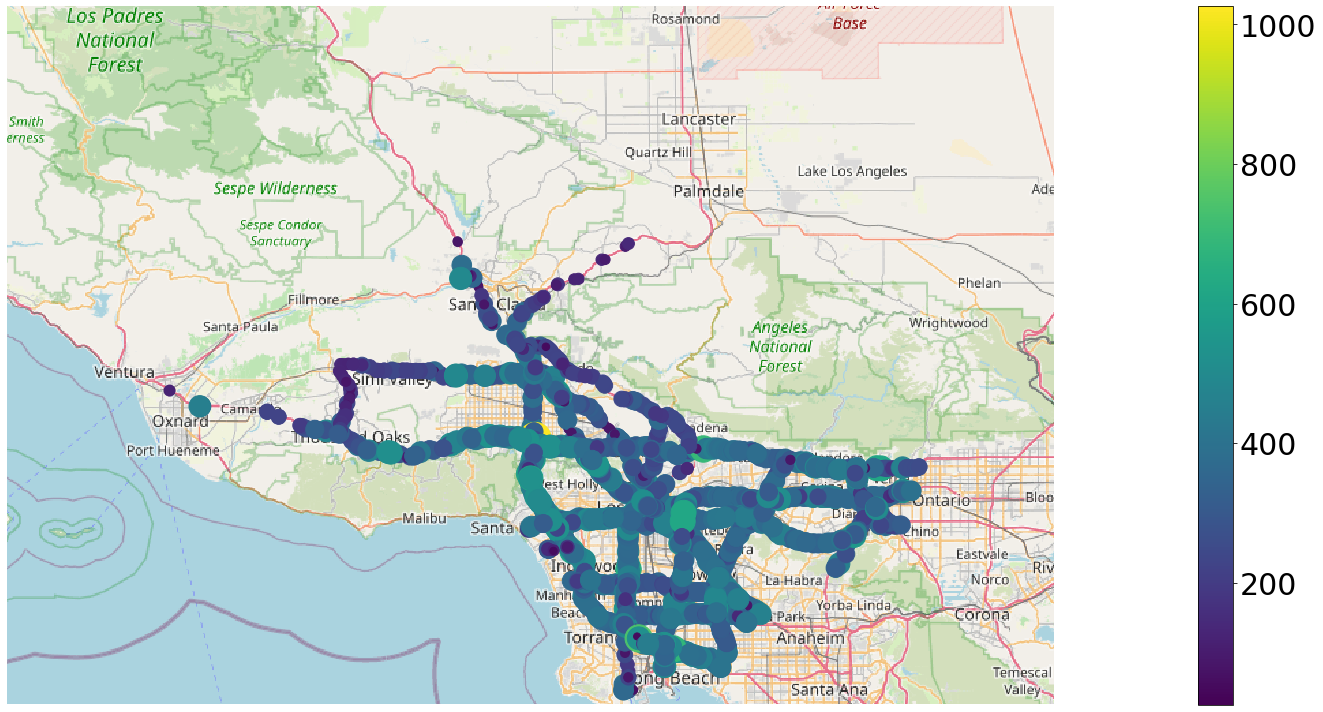

In [ ]:
mag = 2
# plt.figure(figsize=[20*mag, 16*mag])

lat1 = 33.9
lat2 = 34.5
long1 = -119.
long2 = -117.6
fs = 30  # fontsize

la = smopy.Map((lat1, long1, lat2, long2),z=9)
ax = la.show_mpl(figsize=[20*mag, 5*mag])
long_, lat_ = la.to_pixels(data_new_avg['Lat'], data_new_avg['Long'])
plt.scatter(long_, lat_, s=q_avg[data_new_avg.index], c=q_avg[data_new_avg.index])
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

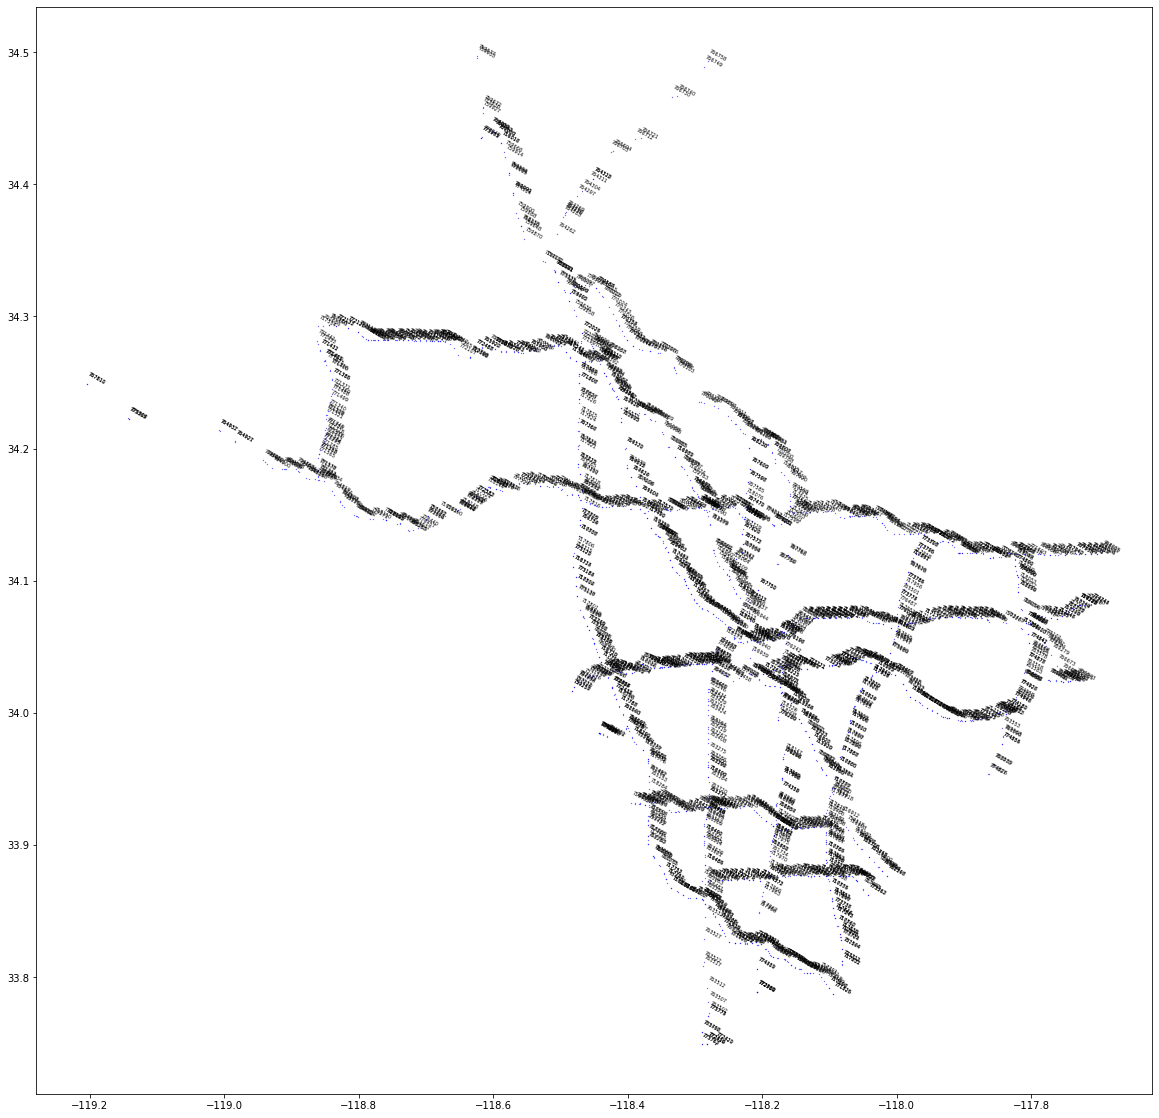

In [ ]:
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111)
ax.plot(data_new_avg_org['Long'].values, data_new_avg_org['Lat'].values, 'b.', markersize=.5)
for i in range(len(data_new_avg_org)):
#     ipdb.set_trace()
    try:
        ID = data_new_avg_org.loc[i, 'ID']
        long = data_new_avg_org.loc[i, 'Long']
        lat = data_new_avg_org.loc[i, 'Lat']
        ax.text(long, lat, str(ID), fontsize=5, rotation=-30)
    except Exception as e:
        print(e)
        ipdb.set_trace()
# plt.savefig('network_-30.svg', format='svg')

## 因为检测器可能在一个地点有两个（双向检测），所以要找出同一个地方的检测器，然后把他们合并成一个node（直接取平均）

In [7]:
# 选择一个临界点，以判断两个检测器是否可以被当成是一个节点
p1 = data_new_avg[data_new_avg['ID']==764932]
p2 = data_new_avg[data_new_avg['ID']==764937]

bd = np.sqrt((p1['Long'].values - p2['Long'].values)**2 + (p1['Lat'].values - p2['Lat'].values)**2)

In [8]:
data_new_avg = data_new_avg_org

node = pd.DataFrame([], columns=['ID', 'q', 'k', 'v', 'Long', 'Lat'])
rep_ID = []
drop_ID = []

for i in range(len(data_new_avg)):
    if i in drop_ID:
        continue
        
    if i%100 == 0:
        print('Start node %i out of %i'%(i, len(data_new_avg)))
    long1 = data_new_avg.loc[i, 'Long']
    lat1 = data_new_avg.loc[i, 'Lat']
    for j in range(len(data_new_avg)):
        if i in drop_ID or i==j:
            continue
            
        long2 = data_new_avg.loc[j, 'Long']
        lat2 = data_new_avg.loc[j, 'Lat']
#         ipdb.set_trace()
        if np.sqrt((long1-long2)**2+(lat1-lat2)**2) <= bd[0]:
            # 说明有同一个地方的检测器
            node = node.append(data_new_avg.loc[i])  # node的ID是i的ID
            rep_ID.append([i, j, data_new_avg.loc[j, 'ID']])  # j's ID
            
            node.loc[node.index[-1], 'q'] = (data_new_avg.loc[j, 'q'] + node.loc[node.index[-1], 'q'])/2
            node.loc[node.index[-1], 'k'] = (data_new_avg.loc[j, 'k'] + node.loc[node.index[-1], 'k'])/2
            node.loc[node.index[-1], 'v'] = (data_new_avg.loc[j, 'v'] + node.loc[node.index[-1], 'v'])/2
            
            drop_ID.append(j)

Start node 0 out of 1875
Start node 100 out of 1875
Start node 700 out of 1875
Start node 800 out of 1875
Start node 1000 out of 1875
Start node 1200 out of 1875
Start node 1300 out of 1875
Start node 1600 out of 1875
Start node 1700 out of 1875


In [9]:
rep_ID_df = pd.DataFrame(rep_ID, columns=['i', 'j', 'ID'])

data_new_avg = data_new_avg.drop(rep_ID_df['j'].values)

# data_new_avg的index包含node的index

In [10]:
for i in data_new_avg.index:
    if not data_new_avg.loc[i, 'ID'] in node['ID'].values:  # 代表这个点在他的位置只有单向交通流检测
        node = node.append(data_new_avg.loc[i])

In [11]:
node = node.drop(columns=['index'])
node['ID'] = node['ID'].astype(int)

In [12]:
node = node.reset_index()
node

,index,ID,q,k,v,Long,Lat
0,0,715898,410.684028,0.090358,62.457812,-118.021787,33.880183
1,3,715929,405.503472,0.154721,54.573437,-118.123095,33.971707
2,5,715933,383.663194,0.131772,56.324479,-118.130679,33.981839
3,6,715938,393.451389,0.137075,54.980208,-118.150997,34.002541
4,7,715944,381.265625,0.151283,56.689583,-118.166091,34.013676
...,...,...,...,...,...,...,...
1316,1863,776457,308.024306,0.048418,68.017014,-118.712596,34.140004
1317,1864,776465,252.569444,0.050435,66.585069,-118.865433,34.176675
1318,1865,776480,318.086806,0.165058,53.344792,-118.231606,34.053569
1319,1866,776487,314.135417,0.066274,64.290278,-117.997784,34.079858


## node 的可视化

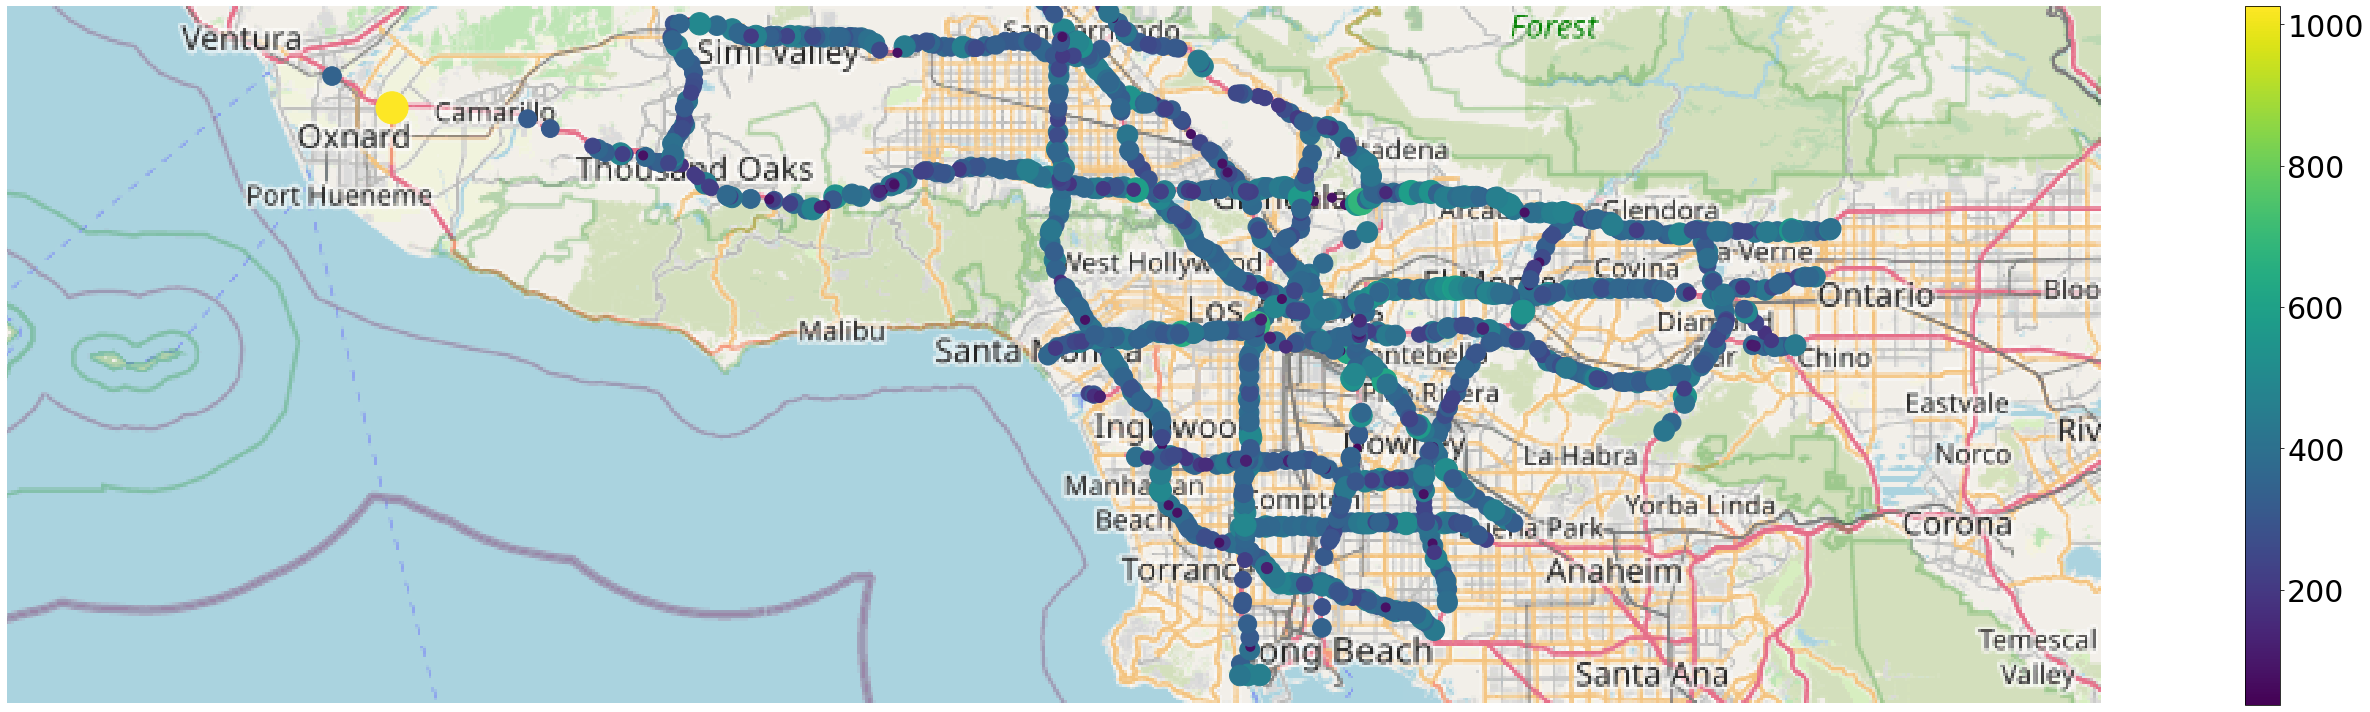

In [35]:
mag = 2
# plt.figure(figsize=[20*mag, 16*mag])

lat1 = 33.9
lat2 = 34.1
long1 = -119.
long2 = -117.6
fs = 30  # fontsize

la = smopy.Map((lat1, long1, lat2, long2),z=9)
ax = la.show_mpl(figsize=[20*mag, 5*mag])
long_, lat_ = la.to_pixels(node['Lat'], node['Long'])
plt.scatter(long_, lat_, s=q_avg[node.index], c=q_avg[node.index])
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.savefig('./img/Map.png', dpi=500)

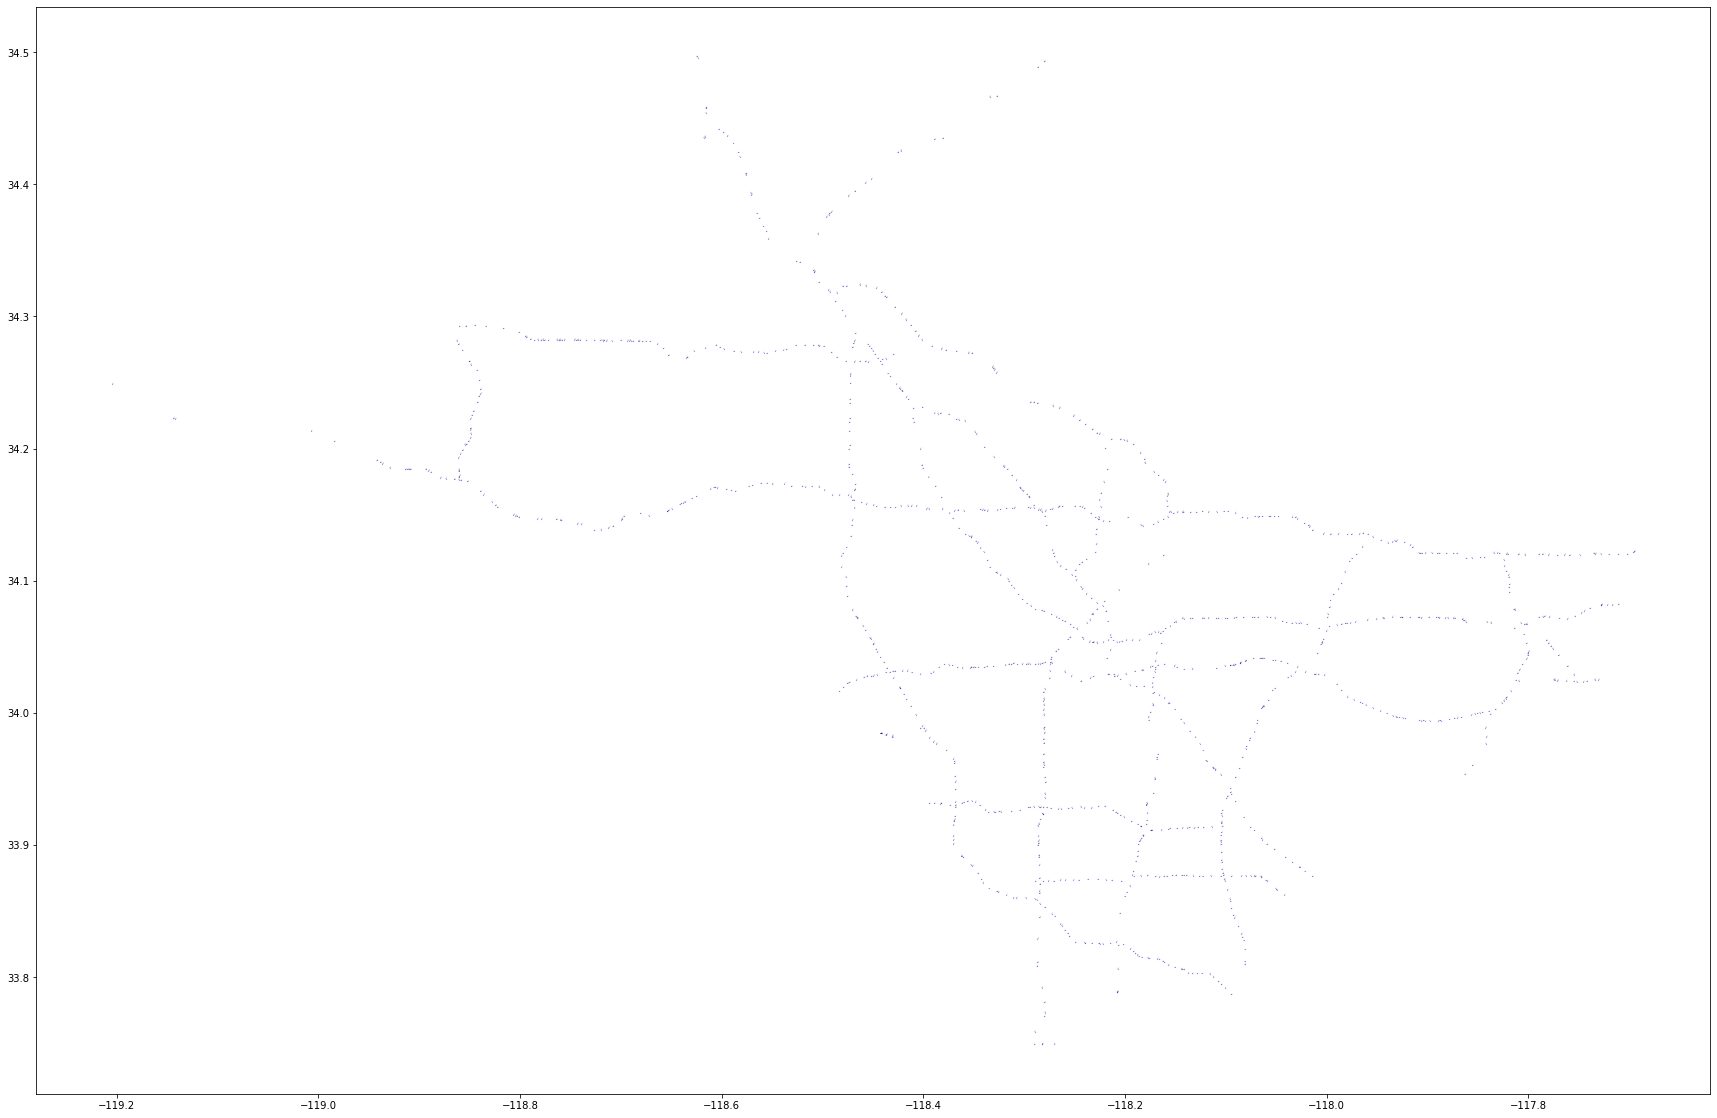

In [ ]:
fig = plt.figure(figsize=[30,20])
ax = fig.add_subplot(111)
ax.plot(node['Long'].values, node['Lat'].values, 'b.', markersize=.3)
for i in node.index:
#     ipdb.set_trace()
    try:
        ID = i
        long = node.loc[i, 'Long']
        lat = node.loc[i, 'Lat']
        ax.text(long, lat, str(ID), fontsize=1, rotation=30)
    except Exception as e:
        print(e)
        ipdb.set_trace()

plt.savefig('network_30_node.svg', format='svg')

# 把node中多余的点去掉
453, 344, 284, 75, 76, 535, 536, 278, 318, 319, 56, 217, 474, 482, 483, 29, 30

In [17]:
drop_lst = [453, 344, 284, 75, 76, 535, 536, 278, 318, 319, 56, 217, 474, 482, 483, 29, 30]
node_org = node.copy()
node = node.drop(drop_lst)

In [18]:
node

,index,ID,q,k,v,Long,Lat
0,0,715898,410.684028,0.090358,62.457812,-118.021787,33.880183
1,3,715929,405.503472,0.154721,54.573437,-118.123095,33.971707
2,5,715933,383.663194,0.131772,56.324479,-118.130679,33.981839
3,6,715938,393.451389,0.137075,54.980208,-118.150997,34.002541
4,7,715944,381.265625,0.151283,56.689583,-118.166091,34.013676
...,...,...,...,...,...,...,...
1316,1863,776457,308.024306,0.048418,68.017014,-118.712596,34.140004
1317,1864,776465,252.569444,0.050435,66.585069,-118.865433,34.176675
1318,1865,776480,318.086806,0.165058,53.344792,-118.231606,34.053569
1319,1866,776487,314.135417,0.066274,64.290278,-117.997784,34.079858


In [19]:
edges = pd.read_csv('./Proj_data/edges.csv')
edges['q'] = ''
edges['k'] = ''
edges['v'] = ''

for i in range(len(edges)):
    node1 = edges.loc[i, 'node1']
    node2 = edges.loc[i, 'node2']
    q1 = node.loc[node1, 'q']
    q2 = node.loc[node2, 'q']
    k1 = node.loc[node1, 'k']
    k2 = node.loc[node2, 'k']
    v1 = node.loc[node1, 'v']
    v2 = node.loc[node2, 'v']
    
    edges.loc[i, 'q'] = (q1+q2)/2
    edges.loc[i, 'k'] = (k1+k2)/2
    edges.loc[i, 'v'] = (v1+v2)/2

In [20]:
edges

,node1,node2,q,k,v
0,409,1301,244.808,0.0797569,62.1049
1,1301,560,221.51,0.0600059,64.4988
2,560,370,202.17,0.0582141,65.0863
3,370,369,211.944,0.0611608,65.3558
4,369,1135,227.368,0.0660154,64.4037
...,...,...,...,...,...
1394,40,609,322.204,0.107069,58.9121
1395,609,387,350.846,0.101768,59.7804
1396,387,1278,348.197,0.0987427,58.4443
1397,92,98,415.464,0.126486,56.6858


In [21]:
edges.to_csv('./Proj_Data/edges_with_qkv.csv')
node.to_csv('./Proj_Data/node.csv')

# kqv的时序可视化（选择了某个检测器）

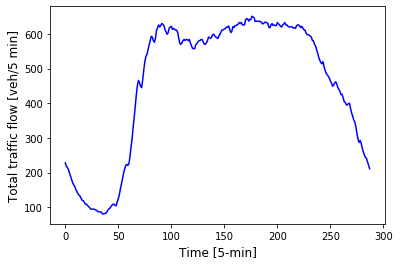

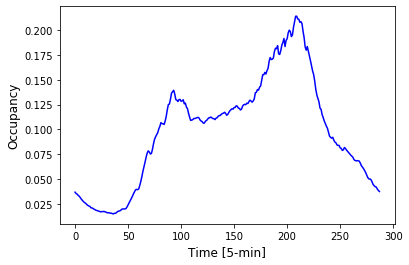

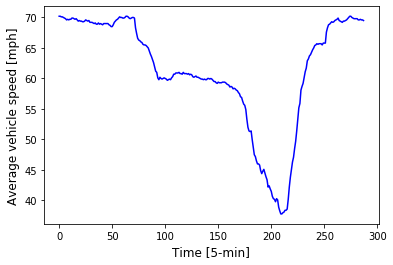

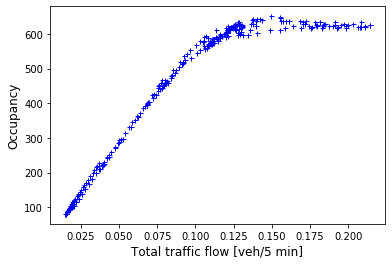

In [36]:
plt.figure()
plt.xlabel('Time [5-min]', fontsize=12)
plt.ylabel('Total traffic flow [veh/5 min]', fontsize=12)
plt.plot(range(len(data_new[data_new['ID']==715898]['q'])), data_new[data_new['ID']==715898]['q'], 'b')
plt.savefig('./img/1a.png', dpi=500)

plt.figure()
plt.xlabel('Time [5-min]', fontsize=12)
plt.ylabel('Occupancy', fontsize=12)
plt.plot(range(len(data_new[data_new['ID']==715898]['Avg k'])), data_new[data_new['ID']==715898]['Avg k'], 'b')
plt.savefig('./img/1b.png', dpi=500)

plt.figure()
plt.xlabel('Time [5-min]', fontsize=12)
plt.ylabel('Average vehicle speed [mph]', fontsize=12)
plt.plot(range(len(data_new[data_new['ID']==715898]['Avg v'])), data_new[data_new['ID']==715898]['Avg v'], 'b')
plt.savefig('./img/1c.png', dpi=500)

plt.figure()
plt.xlabel('Total traffic flow [veh/5 min]', fontsize=12)
plt.ylabel('Occupancy', fontsize=12)
plt.plot(data_new[data_new['ID']==715898]['Avg k'], data_new[data_new['ID']==715898]['q'], 'b+', markersize=5)
plt.savefig('./img/2.png', dpi=500)

In [ ]:
print(q_avg.shape)
print(len(data_new['ID'].drop_duplicates()))